In [1]:
import praw
import pandas as pd
import seaborn as sns




In [2]:

# Initialize Reddit instance
reddit = praw.Reddit(
    client_id="A0shhVWnD2ixWSByzgYcMQ",         # your client id
    client_secret="AO3QK1PWMSnQ_JtGOafBueN7a9QZxQ", # your client secret
    user_agent="nlp-test"                     # your user agent
)

# Get subreddit information
subreddit = reddit.subreddit("bangladesh")

# Get the top 100 posts from the subreddit
top_posts = subreddit.top()

# Create a list to store comment data
comments_data = []

# Loop through the top posts and collect comment data
for post in top_posts:
    # Fetch comments for the post
    post.comments.replace_more(limit=None)
    for comment in post.comments.list():
        comment_data = {
            "Comment Text": comment.body,
            "Comment Score": comment.score,
            "Parent Comment ID": comment.parent_id,
            "Comment Depth": comment.depth,
            "Created Timestamp": comment.created_utc
        }
        comments_data.append(comment_data)

# Create a DataFrame from the collected comment data
comments_df = pd.DataFrame(comments_data)

# Display the comments DataFrame
print(comments_df)


                                           Comment Text  Comment Score  \
0     For anyone trying to report this on Facebook: ...            487   
1     I would also suggest those that live overseas,...            204   
2     There's an app called FireChat that will allow...            811   
3     Please use this thread if you know of any way ...            130   
4     Gilded to help boost OP's post.\n\nI highly re...            395   
...                                                 ...            ...   
5785  XD as a non-Dhakaiyan I can assure you, I don'...              2   
5786  I used to hear handling mara in school but now...              2   
5787                                           Yes bro.              2   
5788  LOL I was kidding man. I wanted my post to loo...              1   
5789                                        I feel dumb              2   

     Parent Comment ID  Comment Depth  Created Timestamp  
0            t3_94rfy3              0       1.533474

In [4]:
comments_df

,Comment Text,Comment Score,Parent Comment ID,Comment Depth,Created Timestamp
0,For anyone trying to report this on Facebook: ...,487,t3_94rfy3,0,1.533474e+09
1,"I would also suggest those that live overseas,...",204,t3_94rfy3,0,1.533476e+09
2,There's an app called FireChat that will allow...,811,t3_94rfy3,0,1.533475e+09
3,Please use this thread if you know of any way ...,130,t3_94rfy3,0,1.533473e+09
4,Gilded to help boost OP's post.\n\nI highly re...,395,t3_94rfy3,0,1.533474e+09
...,...,...,...,...,...
5785,"XD as a non-Dhakaiyan I can assure you, I don'...",2,t1_gp9o7xt,2,1.614577e+09
5786,I used to hear handling mara in school but now...,2,t1_gpab7w7,2,1.614610e+09
5787,Yes bro.,2,t1_gpa5rvu,2,1.614593e+09
5788,LOL I was kidding man. I wanted my post to loo...,1,t1_gpdnv2f,3,1.614676e+09


In [5]:
dfc= pd.read_csv("reddit_majority_label.csv")
dfc

,Comments,majority_label
0,For anyone trying to report this on Facebook: ...,-1
1,"I would also suggest those that live overseas,...",0
2,There's an app called FireChat that will allow...,0
3,Please use this thread if you know of any way ...,0
4,Gilded to help boost OP's post.\n\nI highly re...,1
...,...,...
5785,"XD as a non-Dhakaiyan I can assure you, I don'...",0
5786,I used to hear handling mara in school but now...,0
5787,Yes bro.,0
5788,LOL I was kidding man. I wanted my post to loo...,0


In [6]:
comments_df["Sentiment"]=dfc["majority_label"]

In [7]:
comments_df

,Comment Text,Comment Score,Parent Comment ID,Comment Depth,Created Timestamp,Sentiment
0,For anyone trying to report this on Facebook: ...,487,t3_94rfy3,0,1.533474e+09,-1
1,"I would also suggest those that live overseas,...",204,t3_94rfy3,0,1.533476e+09,0
2,There's an app called FireChat that will allow...,811,t3_94rfy3,0,1.533475e+09,0
3,Please use this thread if you know of any way ...,130,t3_94rfy3,0,1.533473e+09,0
4,Gilded to help boost OP's post.\n\nI highly re...,395,t3_94rfy3,0,1.533474e+09,1
...,...,...,...,...,...,...
5785,"XD as a non-Dhakaiyan I can assure you, I don'...",2,t1_gp9o7xt,2,1.614577e+09,0
5786,I used to hear handling mara in school but now...,2,t1_gpab7w7,2,1.614610e+09,0
5787,Yes bro.,2,t1_gpa5rvu,2,1.614593e+09,0
5788,LOL I was kidding man. I wanted my post to loo...,1,t1_gpdnv2f,3,1.614676e+09,0


In [8]:
print(comments_df.head())
print(comments_df.info())
print(comments_df.describe())


                                        Comment Text  Comment Score  \
0  For anyone trying to report this on Facebook: ...            487   
1  I would also suggest those that live overseas,...            204   
2  There's an app called FireChat that will allow...            811   
3  Please use this thread if you know of any way ...            130   
4  Gilded to help boost OP's post.\n\nI highly re...            395   

  Parent Comment ID  Comment Depth  Created Timestamp  Sentiment  
0         t3_94rfy3              0       1.533474e+09         -1  
1         t3_94rfy3              0       1.533476e+09          0  
2         t3_94rfy3              0       1.533475e+09          0  
3         t3_94rfy3              0       1.533473e+09          0  
4         t3_94rfy3              0       1.533474e+09          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790 entries, 0 to 5789
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------      

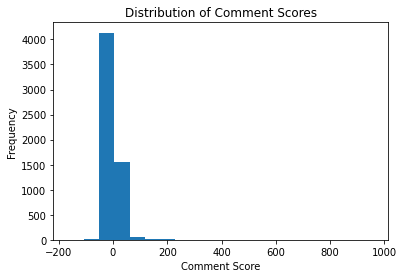

In [9]:
import matplotlib.pyplot as plt

plt.hist(comments_df["Comment Score"], bins=20)
plt.xlabel("Comment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Comment Scores")
plt.show()


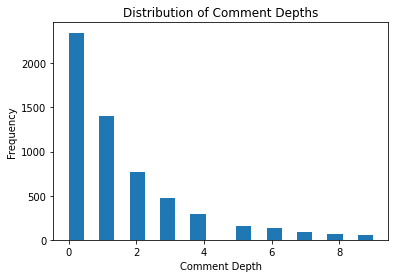

In [10]:
plt.hist(comments_df["Comment Depth"], bins=20)
plt.xlabel("Comment Depth")
plt.ylabel("Frequency")
plt.title("Distribution of Comment Depths")
plt.show()


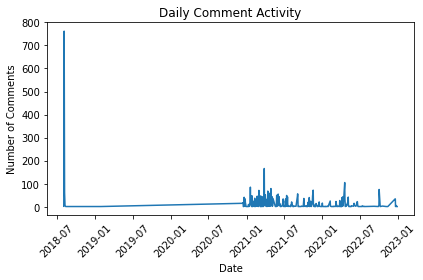

In [11]:
comments_df["Created Timestamp"] = pd.to_datetime(comments_df["Created Timestamp"], unit="s")
comments_df["Date"] = comments_df["Created Timestamp"].dt.date

daily_comment_counts = comments_df.groupby("Date").size()

plt.plot(daily_comment_counts.index, daily_comment_counts.values)
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.title("Daily Comment Activity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


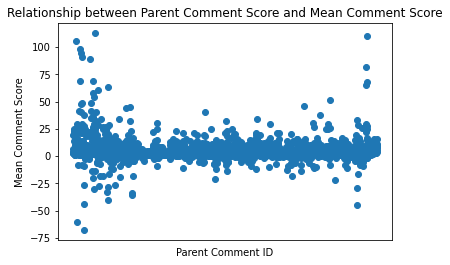

In [12]:
parent_comment_scores = comments_df.groupby("Parent Comment ID")["Comment Score"].mean()

plt.scatter(parent_comment_scores.index, parent_comment_scores.values)
plt.xlabel("Parent Comment ID")
plt.ylabel("Mean Comment Score")
plt.title("Relationship between Parent Comment Score and Mean Comment Score")
plt.xticks([])
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790 entries, 0 to 5789
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Comment Text       5790 non-null   object        
 1   Comment Score      5790 non-null   int64         
 2   Parent Comment ID  5790 non-null   object        
 3   Comment Depth      5790 non-null   int64         
 4   Created Timestamp  5790 non-null   datetime64[ns]
 5   Sentiment          5790 non-null   int64         
 6   Date               5790 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 316.8+ KB
None
                                        Comment Text  Comment Score  \
0  For anyone trying to report this on Facebook: ...            484   
1  I would also suggest those that live overseas,...            207   
2  There's an app called FireChat that will allow...            808   
3  Please use this thread if you know o

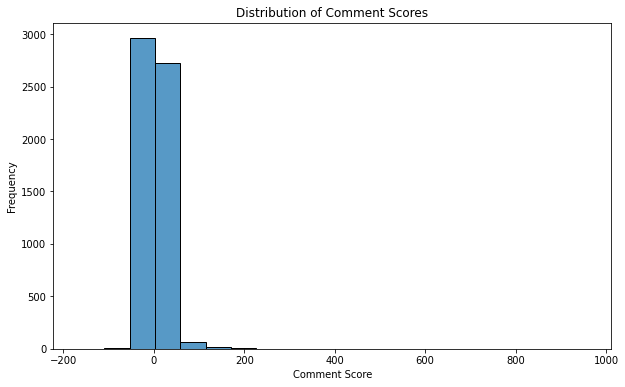

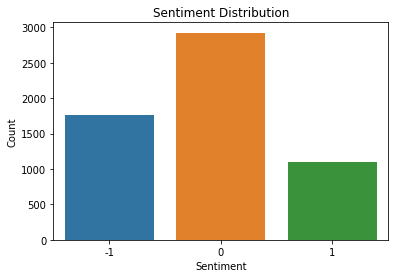

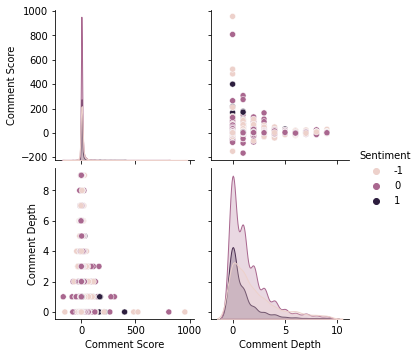

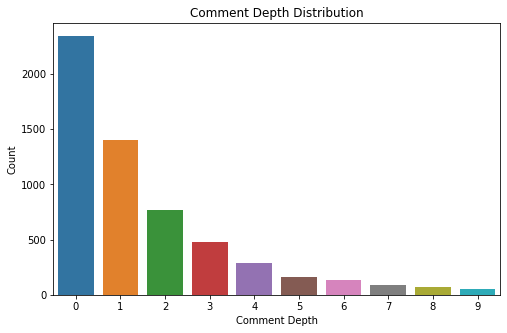

In [14]:
comments_df["Created Timestamp"] = pd.to_datetime(comments_df["Created Timestamp"])
comments_df["Date"] = pd.to_datetime(comments_df["Created Timestamp"])

# Display basic information about the DataFrame
print(comments_df.info())
print(comments_df.head())

# Summary statistics of numerical columns
print(comments_df.describe())

# Distribution of comment scores
plt.figure(figsize=(10, 6))
sns.histplot(data=comments_df, x="Comment Score", bins=20)
plt.title("Distribution of Comment Scores")
plt.xlabel("Comment Score")
plt.ylabel("Frequency")
plt.show()

# Sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=comments_df, x="Sentiment")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Explore relationships between variables
sns.pairplot(data=comments_df, hue="Sentiment")
plt.show()

# Comment depth distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=comments_df, x="Comment Depth")
plt.title("Comment Depth Distribution")
plt.xlabel("Comment Depth")
plt.ylabel("Count")
plt.show()

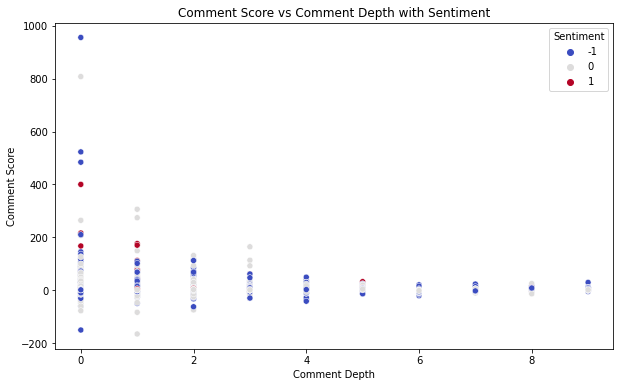

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comments_df, x="Comment Depth", y="Comment Score", hue="Sentiment", palette="coolwarm")
plt.title("Comment Score vs Comment Depth with Sentiment")
plt.xlabel("Comment Depth")
plt.ylabel("Comment Score")
plt.legend(title="Sentiment")
plt.show()

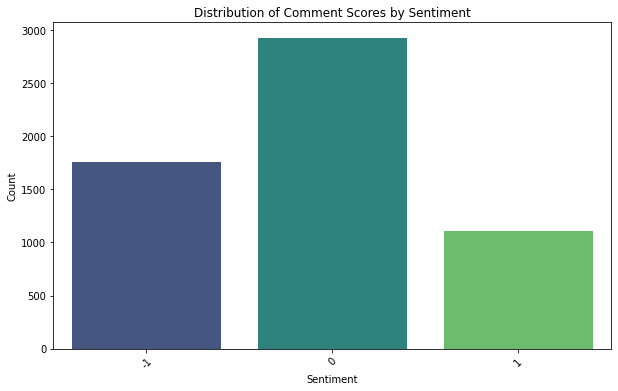

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=comments_df, x="Sentiment", palette="viridis")
plt.title("Distribution of Comment Scores by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

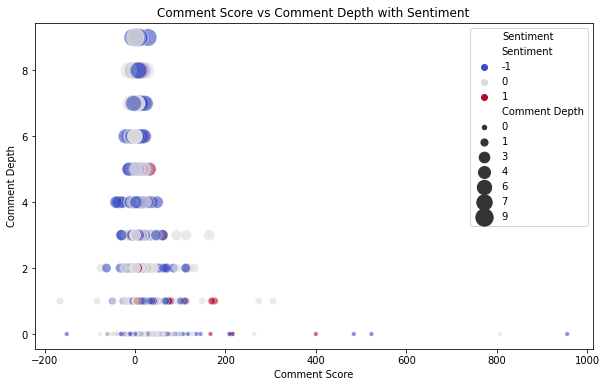

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comments_df, x="Comment Score", y="Comment Depth", hue="Sentiment", palette="coolwarm", alpha=0.6, size="Comment Depth", sizes=(20, 300))
plt.title("Comment Score vs Comment Depth with Sentiment")
plt.xlabel("Comment Score")
plt.ylabel("Comment Depth")
plt.legend(title="Sentiment")
plt.show()

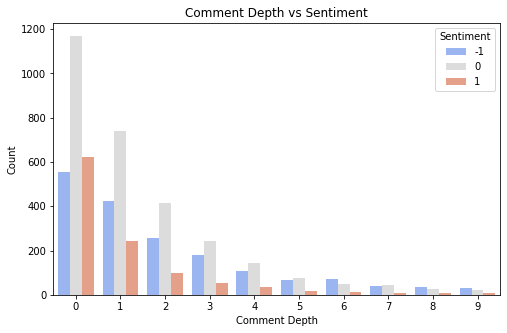

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=comments_df, x="Comment Depth", hue="Sentiment", palette="coolwarm")
plt.title("Comment Depth vs Sentiment")
plt.xlabel("Comment Depth")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()

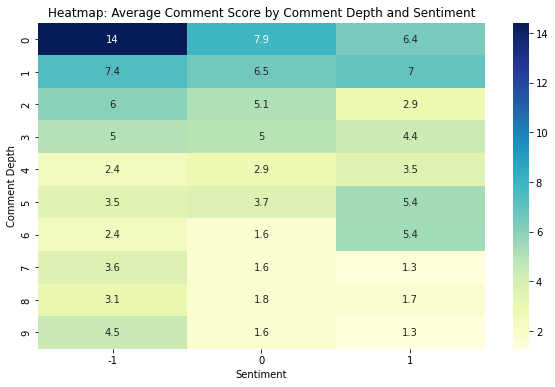

In [19]:
pivot_table = comments_df.pivot_table(index="Comment Depth", columns="Sentiment", values="Comment Score", aggfunc="mean")

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_table, annot=True, cmap="YlGnBu")
plt.title("Heatmap: Average Comment Score by Comment Depth and Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Comment Depth")
plt.show()

In [20]:
comments_df

,Comment Text,Comment Score,Parent Comment ID,Comment Depth,Created Timestamp,Sentiment,Date
0,For anyone trying to report this on Facebook: ...,484,t3_94rfy3,0,2018-08-05 13:00:41,-1,2018-08-05 13:00:41
1,"I would also suggest those that live overseas,...",207,t3_94rfy3,0,2018-08-05 13:29:52,0,2018-08-05 13:29:52
2,There's an app called FireChat that will allow...,808,t3_94rfy3,0,2018-08-05 13:12:09,0,2018-08-05 13:12:09
3,Please use this thread if you know of any way ...,131,t3_94rfy3,0,2018-08-05 12:46:23,0,2018-08-05 12:46:23
4,Gilded to help boost OP's post.\n\nI highly re...,400,t3_94rfy3,0,2018-08-05 12:55:27,1,2018-08-05 12:55:27
...,...,...,...,...,...,...,...
5785,"XD as a non-Dhakaiyan I can assure you, I don'...",2,t1_gp9o7xt,2,2021-03-01 05:37:13,0,2021-03-01 05:37:13
5786,I used to hear handling mara in school but now...,2,t1_gpab7w7,2,2021-03-01 14:38:47,0,2021-03-01 14:38:47
5787,Yes bro.,2,t1_gpa5rvu,2,2021-03-01 10:08:27,0,2021-03-01 10:08:27
5788,LOL I was kidding man. I wanted my post to loo...,1,t1_gpdnv2f,3,2021-03-02 09:01:44,0,2021-03-02 09:01:44
